# Pymaceuticals Inc.
---

### Analysis

- Summary:
    The average final tumor volume for the drug regimens of Capomulin and Ramicane with medians below 40
    were lower than the final tumor volumen for both Infubinol and Ceftamin with median volumes close to 60
    
    There is a strong correlation between average tumor volume and weight of the mice.
    
    The average tumor volume is suggested to be .95 X the weight in grams + 21.55
    
    Shannon Landis
    January 2024
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results,mouse_metadata,  how="left", on=["Mouse ID"])
 

# Display the data table for preview
mouse_study_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [35]:
# Checking the number of mice. 249
mouse_count = mouse_study_complete['Mouse ID'].nunique()
mouse_count


249

In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.   - array(['g989'], dtype=object)
mouse_Timepoint_group = mouse_study_complete.groupby(["Mouse ID", "Timepoint"])
mice_by_Timepoint = pd.DataFrame(mouse_Timepoint_group[["Mouse ID"]].value_counts())
#mice_by_Timepoint.head(25) 
dupe_mice = mice_by_Timepoint.loc[(mice_by_Timepoint["count"]>1)].reset_index()
dupe_mice = dupe_mice["Mouse ID"].unique()
dupe_mice


array(['g989'], dtype=object)

In [37]:
my_mouse = dupe_mice.astype(str)
my_mouse

array(['g989'], dtype='<U4')

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_rows = mouse_study_complete["Mouse ID"].isin(my_mouse)
get_rows = mouse_study_complete[dupe_mice_rows]
get_rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_new = mouse_study_complete[~mouse_study_complete["Mouse ID"].isin(my_mouse)]
mouse_study_new

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [40]:
# Checking the number of mice in the clean DataFrame.
mouse_count_new = mouse_study_new['Mouse ID'].nunique()
mouse_count_new

248

## Summary Statistics

In [41]:
mouse_study_new

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_summary = mouse_study_new.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
mouse_study_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [43]:
drug_regimen_group = mouse_study_new.groupby("Drug Regimen")

drug_by_MiceTimepoint = pd.DataFrame(drug_regimen_group[["Mouse ID", "Timepoint"]].count())
drug_by_MiceTimepoint

,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,148,148
Ramicane,228,228
Stelasyn,181,181


In [44]:
mice_Timepoints_inDrugs = drug_by_MiceTimepoint["Mouse ID"].sort_values(ascending=False)
mice_Timepoints_inDrugs


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

In [45]:
drug_list = mouse_study_new["Drug Regimen"].unique()
drug_list
x_axis = np.arange(0,len(mice_Timepoints_inDrugs))


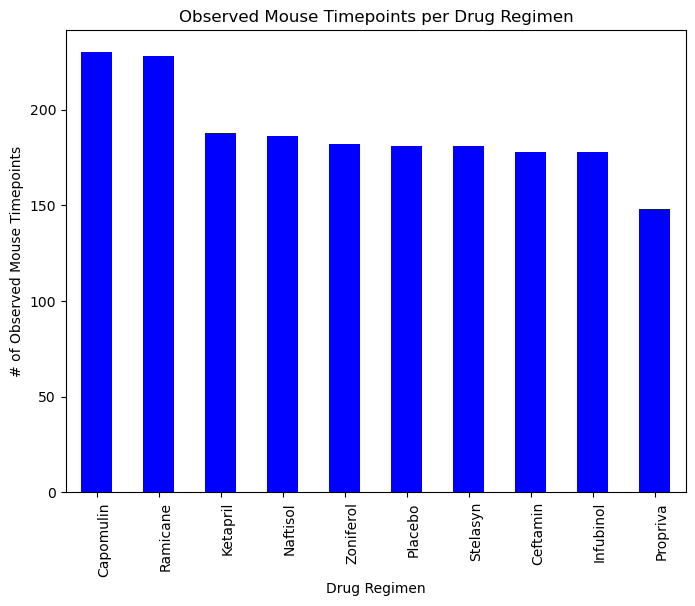

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

figure1 = mice_Timepoints_inDrugs.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Observed Mouse Timepoints per Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")

# Configure x-tick rotation
xticklabels = mice_Timepoints_inDrugs.index
figure1.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()


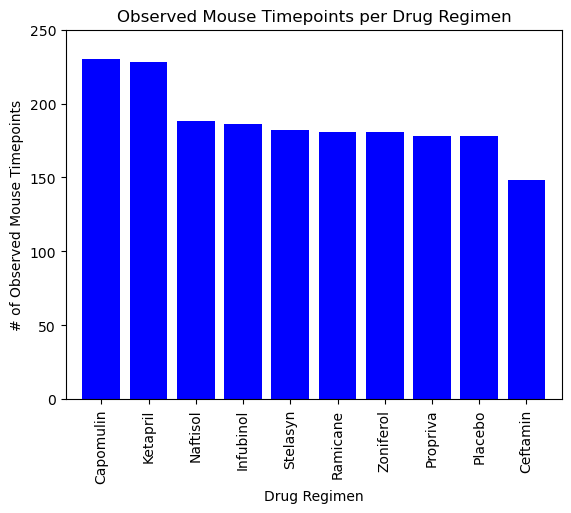

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(x_axis, mice_Timepoints_inDrugs, color="b", align="center")

#tick_locations = [value for value in x_axis]
tick_locations = []
for x in x_axis:
        tick_locations.append(x)
plt.xticks(tick_locations, drug_list)
plt.xticks(rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_Timepoints_inDrugs)+20)
plt.title("Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [17]:
mouse_study_new

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [48]:
mice_by_gender = mouse_study_new.groupby(["Sex"])
total_mice_by_gender = mice_by_gender[["Sex"]].count()
total_mice_by_gender_sort = total_mice_by_gender["Sex"].sort_values(ascending=False)
total_mice_by_gender_sort


Sex
Male      958
Female    922
Name: Sex, dtype: int64

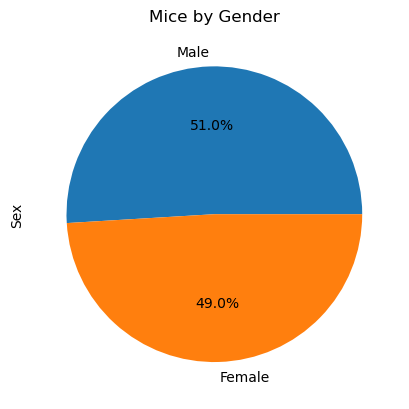

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = total_mice_by_gender_sort.plot(kind="pie", y='Sex',autopct="%1.1f%%", title="Mice by Gender")
plt.show()

In [50]:
mice_list = mouse_study_new["Sex"].unique().tolist()
mice_list

['Female', 'Male']

In [51]:
mice_gender_count = mice_by_gender["Sex"].count().tolist()
mice_gender_count

[922, 958]

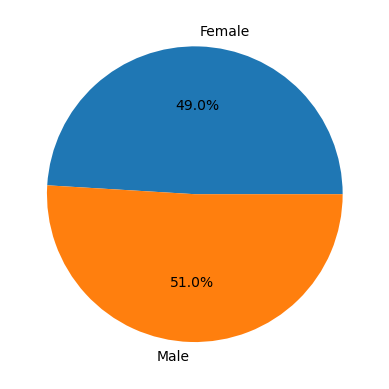

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender_count, labels=mice_list,
        autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
mouse_study_new

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_df = mouse_study_new[mouse_study_new['Drug Regimen'].isin(treatment_regimens)]
treatment_df

# Start by getting the last (greatest) timepoint for each mouse
max_Timepoint_by_Mouse = mouse_study_new.groupby("Mouse ID")['Timepoint'].max().reset_index()
max_Timepoint_by_Mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_Tumor_volume_byMouse = pd.merge(max_Timepoint_by_Mouse, treatment_df, on=["Mouse ID", "Timepoint"], how='inner')
last_Tumor_volume_byMouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [63]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_regimens  #already created list above

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
#tumorSize_by_Drug = last_Tumor_volume_byMouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].apply(list)
#tumorSize_by_Drug


 # Locate the rows which contain mice on each drug and get the tumor volumes
tumorSize_by_Drug_df = last_Tumor_volume_byMouse[["Drug Regimen", "Tumor Volume (mm3)"]]
tumorSize_by_Drug_df

    
    # add subset   
tumor_volumes = last_Tumor_volume_byMouse['Tumor Volume (mm3)']
tumor_volumes
    
    # Determine outliers using upper and lower bounds
quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 37.1877438025
The upper quartile of tumor volume is: 59.930261755
The interquartile range of tumor volume is: 22.742517952499995
The the median of tumor volume is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [55]:
 # Locate the rows which contain mice on each drug and get the tumor volumes
tumorSize_by_Drug_df = last_Tumor_volume_byMouse[["Drug Regimen", "Tumor Volume (mm3)"]]
tumorSize_by_Drug_df
                                                             

                                                             
                                                             

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696


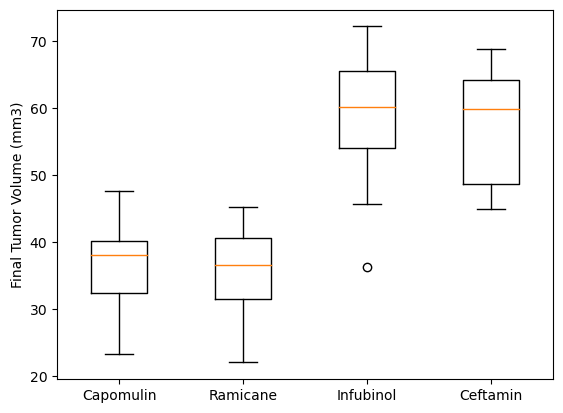

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
data_to_plot=[]
tick_labels=[]
for x in treatment_regimens:
    data_to_plot.append(tumorSize_by_Drug_df["Tumor Volume (mm3)"][tumorSize_by_Drug_df["Drug Regimen"]==x])
    tick_labels.append(x)

bp = ax.boxplot(data_to_plot)
ax.set_xticklabels(tick_labels)
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

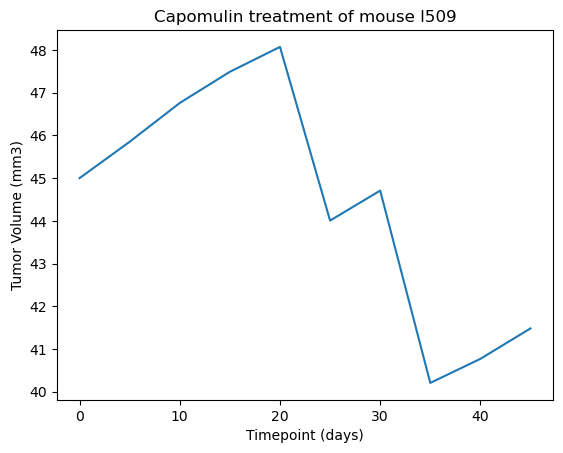

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_to_plot = mouse_study_new[(mouse_study_new["Drug Regimen"]=='Capomulin') & (mouse_study_new["Mouse ID"]== 'l509')]
mouse_to_plot
plt.plot(mouse_to_plot["Timepoint"], mouse_to_plot["Tumor Volume (mm3)"])
plt.xlabel('Timepoint (days)')
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

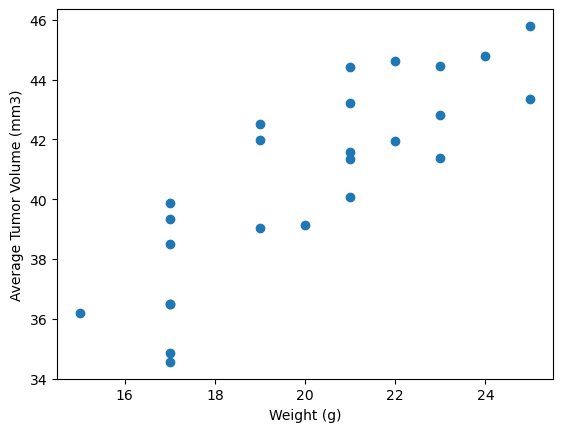

In [58]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_only = pd.DataFrame(mouse_study_new.groupby(["Drug Regimen", "Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capomulin_only = capomulin_only[capomulin_only["Drug Regimen"]=='Capomulin']
capomulin_only


plt.scatter(capomulin_only["Weight (g)"], capomulin_only["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [59]:
# Calculate the correlation coefficient and a linear regression model 
tumor_volume = capomulin_only["Tumor Volume (mm3)"]
weight_capomulin = capomulin_only["Weight (g)"]

correlation = st.pearsonr(tumor_volume,weight_capomulin)
print(f"The correlation betwen Tumor Volume (mms) and Weight (g) is {round(correlation[0],2)}")

The correlation betwen Tumor Volume (mms) and Weight (g) is 0.84


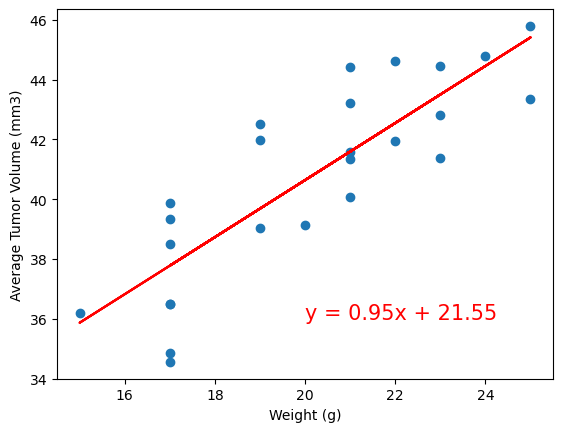

In [62]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimenx_values = capomulin_only["Weight (g)"]
x_values = capomulin_only["Weight (g)"]
y_values = capomulin_only["Tumor Volume (mm3)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

SyntaxError: invalid syntax (3790261177.py, line 1)